In [6]:
# pip install xarray numpy cartopy requests scipy

In [7]:
import requests
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from cartopy import crs as ccrs, feature as cfeat
from pathlib import Path

Download the list of available data files from the dev server. This is also used to populate the data store at https://xds-dev.ecmwf.int/datasets/ad4gd-air-quality As an example, take the first URL to download.

In [8]:
r = requests.get("http://ad4gd-test.ecmwf-development.f.ewcloud.host/manifest.txt")
first_url = r.text.split("\n")[0]
filename = first_url.split("/")[-1]
filepath = f"sample_data/{filename}"
filepath

'sample_data/iot_cams_pm10_hourly_20241001.nc'

In [9]:
print(f"Downloading {filename}")
data = requests.get(first_url)
with open(filepath, "wb") as f:
    f.write(data.content)

In [10]:
print(f"Opening dataset")
# If for some reason the data server is inaccessible, try these local files instead:
# ds = xr.open_dataset("sample_data/iot_cams_pm10_hourly_20241001.nc", engine="netcdf4")
# ds = xr.open_dataset("sample_data/iot_cams_pm25_hourly_20241114.nc", engine="netcdf4")
ds = xr.open_dataset(filepath, engine="netcdf4")
ds

Opening dataset


<xarray.Dataset>
Dimensions:  (lat: 871, lon: 1350, time: 24)
Coordinates:
  * lat      (lat) float64 46.51 46.52 46.52 46.53 ... 55.17 55.18 55.19 55.2
  * lon      (lon) float64 2.005 2.015 2.025 2.035 ... 15.46 15.47 15.48 15.49
  * time     (time) datetime64[ns] 2024-10-01 ... 2024-10-01T23:00:00
Data variables:
    pm10     (time, lat, lon) float32 ...
Attributes:
    title:        PM10 mass concentration
    Conventions:  CF-1.8
    institution:  AD4GD
    source:       IoT sensor network
    history:      Created 2025-04-09 15:08:22.399398
    summary:      A high resolution dataset for particulate matter (PM2.5 and...
    license:      The dataset is distributed under the Licence to Use Coperni...
    references:   https://doi.org/10.5281/zenodo.10839023

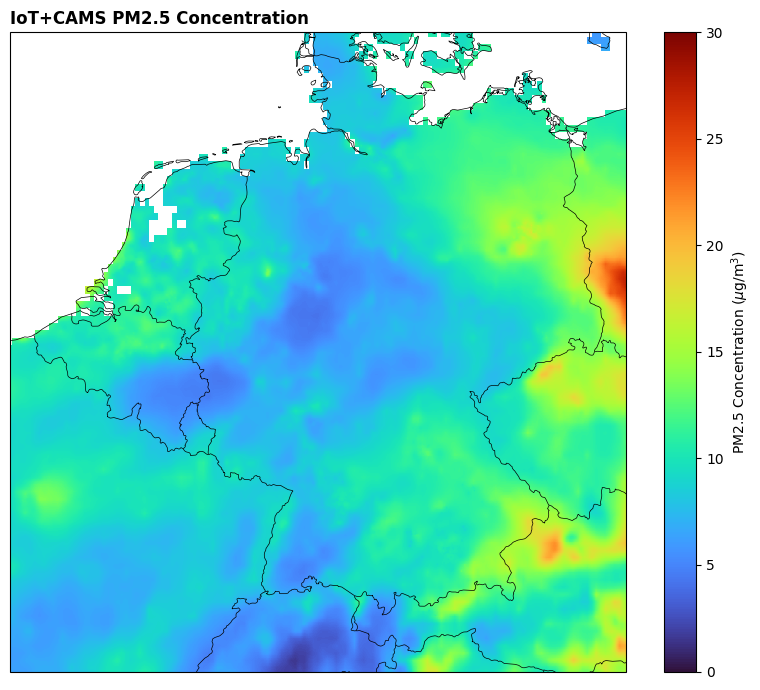

In [11]:
mods = ds.mean('time')
data_var = list(mods.data_vars)[0]
data = mods[data_var]
 
fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_aspect('auto')
cm = ax.pcolormesh(mods.lon, mods.lat, data, vmin=0, vmax=30,
                   cmap='turbo', transform=ccrs.PlateCarree())
plt.colorbar(cm, ax=ax, label=r'PM2.5 Concentration ($\mu$g/m$^3$)')
ax.coastlines('10m', lw=0.5)
ax.add_feature(cfeat.BORDERS, lw=0.5)
ax.set_title('IoT+CAMS PM2.5 Concentration', fontweight='bold', loc='left')
plt.tight_layout()

Generate a small icon

/Users/math/micromamba/envs/jupyter/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


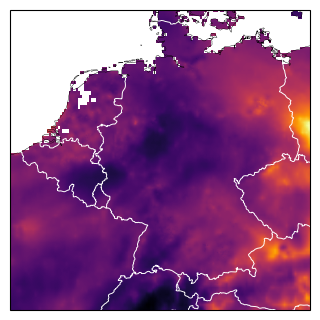

In [12]:
fig = plt.figure(figsize=(3, 3), dpi=100)  # 300px x 300px
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_aspect('auto')
cm = ax.pcolormesh(mods.lon, mods.lat, data, cmap='inferno', transform=ccrs.PlateCarree())
ax.coastlines('10m', lw=0.3)
ax.add_feature(cfeat.BORDERS, lw=0.7, color = "white")
plt.tight_layout(pad=0)

fig.savefig("icon.png")